In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import	seaborn	as	sns
from	sklearn.model_selection	import	train_test_split
from	sklearn.preprocessing	import	StandardScaler,	LabelEncoder
from	sklearn.linear_model	import	LogisticRegression
from	sklearn.metrics	import	confusion_matrix,	accuracy_score,	precision_score,	recall_score

In [2]:
 
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:

# Creating a mapping for Gender
gender_mapping = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\Shruti\AppData\Local\Temp\ipykernel_3376\24104161.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [8]:
#	Split	data	into	features	and	target	variable
X	=	df[['Age',	'Gender',	'EstimatedSalary']]
y	=	df['Purchased']

In [9]:
#	Split	into	training	and	test	sets
X_train,X_test,	y_train,y_test	=	train_test_split(X,	y,	test_size=0.25,	random_state=42)

In [10]:
# Feature	scaling
scaler	=	StandardScaler()
X_train	=	scaler.fit_transform(X_train)
X_test	=	scaler.transform(X_test)

In [11]:
#	Train	Logistic	Regression	model
classifier	=	LogisticRegression(random_state=42)
classifier.fit(X_train,	y_train)
#	Predicton	test	set
y_pred	=	classifier.predict(X_test)
y_prob	=	classifier.predict_proba(X_test)[:,	1]		#	Get	probabilities	for	class	1	(Purchased)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [12]:
#	Compute	confusion	matrix
cm	=	confusion_matrix(y_test,	y_pred)
TP	=	cm[1,	1]
FP	=	cm[0,	1]
TN	=	cm[0,	0]
FN	=	cm[1,	0]
#	Print	results
#	Compute	evaluation	metrics+

accuracy	=	accuracy_score(y_test,	y_pred)
error_rate	=	1	-	accuracy
precision	=	precision_score(y_test,	y_pred,	zero_division=1)
recall	=	recall_score(y_test,	y_pred,	)

In [13]:
 #	Print	results
 print("\nConfusion Matrix:\n",	cm)


Confusion Matrix:
 [[61  2]
 [10 27]]


In [14]:
print(f"\nAccuracy:{accuracy:.2f}(Formula:(TP+TN)/(TP+FP+TN	+FN))")


Accuracy:0.88(Formula:(TP+TN)/(TP+FP+TN	+FN))


In [15]:
 print(f"Error	Rate:	{error_rate:.2f}	(Formula:	1	-	Accuracy)")

Error	Rate:	0.12	(Formula:	1	-	Accuracy)


In [16]:
# Print Precision
print(f"Precision: {precision:.2f} (Formula: TP / (TP + FP))")

Precision: 0.93 (Formula: TP / (TP + FP))


In [17]:
# Print Recall
print(f"Recall: {recall:.2f} (Formula: TP / (TP + FN))")

Recall: 0.73 (Formula: TP / (TP + FN))


In [18]:
# Display some predictions with their probabilities
df_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Probability": y_prob
})
print("\nSample Predictions with Probability:\n", df_results.head())


Sample Predictions with Probability:
    Actual  Predicted  Probability
0       0          0     0.256173
1       1          1     0.970592
2       0          0     0.022059
3       1          1     0.840024
4       0          0     0.016168


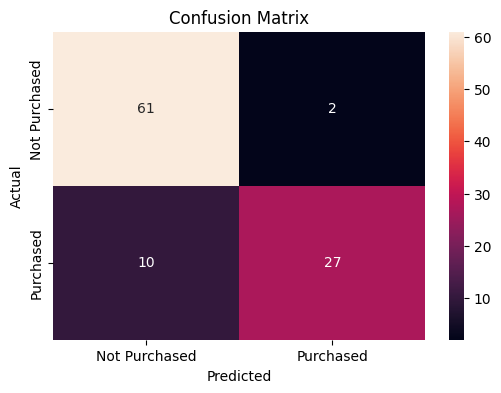

In [20]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, 
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()